<a href="https://colab.research.google.com/github/adalves-ufabc/2022.Q2-PLN/blob/main/2022_Q2_PLN_Notebook_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2022.Q2]**
Prof. Alexandre Donizeti Alves

# **Extração e Pré-processamento de Dados**

---





Neste caderno, vamos cobrir várias fontes de dados de **texto** e maneiras de extraí-los.


***Free source***

Uma grande quantidade de dados está disponível gratuitamente na Internet. Precisamos apenas simplificar o problema e começar a explorar múltiplas fontes de dados gratuitas.

>• Free APIs (Twitter)

>• Wikipedia

>• United States Government data (https://www.data.gov/)

>• United States Census data (https://www.census.gov/data.html)

>• United States Health care claim data (https://www.healthdata.gov/)

>• Weather Service (https://www.weather.gov/)

>• NASA (https://data.nasa.gov/)

>• The World Bank (https://data.worldbank.org/)

>• Datahub (https://datahub.io/)

>• Microdados ENEM (http://portal.inep.gov.br/microdados)

>• Portal Brasileiro de Dados Abertos (https://dados.gov.br/)

### **01. Coletando dados de texto usando APIs**

O **Twitter** tem uma quantidade gigantesca de dados com muito valor. Há uma quantidade enorme de tweets todos os dias, e cada tweet tem uma história para contar. Quando esses dados são coletados e analisados, fornecem uma enorme quantidade de *insights* sobre uma empresa, produto, serviço etc.

O primeiro passo é fazer login no portal do desenvolvedor do Twitter:

> https://developer.twitter.com/en

Crie seu próprio aplicativo (app) no portal do desenvolvedor do Twitter e obtenha as chaves mencionadas abaixo. Depois de ter essas credenciais, você pode começar a baixar dados. 

> 

**Chaves necessárias**:
> *consumer key*: chave associada ao aplicativo (Twitter, Facebook etc.)

> *consumer secret*: senha usada para autenticação com o servidor de autenticação (Twitter, Facebook etc.)

> *access token*: chave dada ao cliente após o sucesso de autenticação das chaves acima

> *access token secret*: senha para a chave de acesso


In [ ]:
# install tweepy
#!pip install tweepy

# import the libraries
import tweepy as tw
from tweepy import OAuthHandler

# credentials
with open('/content/twitter-tokens.txt', 'r') as tfile:
    consumer_key = tfile.readline().strip('\n')
    consumer_secret = tfile.readline().strip('\n')
    access_token = tfile.readline().strip('\n')
    access_token_secret = tfile.readline().strip('\n')

# calling API
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth)

# provide the query you want to pull the data
query ="Trump"

# fetching tweets
tweets = api.search(query)
tweets

[Status(_api=<tweepy.api.API object at 0x7f1e05e2c4d0>, _json={'created_at': 'Tue Jun 21 17:52:53 +0000 2022', 'id': 1539305369079492608, 'id_str': '1539305369079492608', 'text': 'RT @OccupyDemocrats: BREAKING: Democratic Rep. Jamie Raskin sounds the alarm, says Trump is "essentially" admitting that he attempted a cou…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'OccupyDemocrats', 'name': 'Occupy Democrats', 'id': 878284831, 'id_str': '878284831', 'indices': [3, 19]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 632268227, 'id_str': '632268227', 'name': 'Mark Troutner', 'screen_name': 'mtmmtro', 'location': 'Lodi, CA', 'descripti

In [ ]:
for tweet in tweets:
     print(f'Usuário: {tweet.user} - Tweet: {tweet.text}')

Usuário: User(_api=<tweepy.api.API object at 0x7f1e05e2c4d0>, _json={'id': 632268227, 'id_str': '632268227', 'name': 'Mark Troutner', 'screen_name': 'mtmmtro', 'location': 'Lodi, CA', 'description': 'Loving Husband and proud Father of two awesome sons - life is worth living - be kind - be helpful - be supportive.', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 57, 'friends_count': 146, 'listed_count': 4, 'created_at': 'Tue Jul 10 20:01:05 +0000 2012', 'favourites_count': 7209, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 4056, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'C0DEED', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_u

In [ ]:
for tweet in tweets:
     print(tweet.text)

RT @TheLeoTerrell: President Trump telephoned and left a very warm and personal message. Thank you President Trump. Next to your family, yo…
RT @OccupyDemocrats: BREAKING: President Bush announces his endorsement of January 6 Committee Chair Liz Cheney, and that he will host a fu…
@seanhannity Still waiting on the trump health care plan....
@LeaderMcConnell Moscow Mitch says the Democrats shouldn't play games with the debt ceiling but last I checked he's… https://t.co/89ET73bkT5
@ksorbs Trump called it out years ago. God bless you Kevin praying for you and Sam. Next project, Systematic Decept… https://t.co/grDfanIw1I
RT @reportersalles: "Foi intencional", Wei Jingsheng afirma ter alertado a administração Trump sobre a existência do vírus em novembro de 2…
@760Mark @donttrusttrump1 @britttgriffith @JackPosobiec @jaketapper So let’s take Cloward/Piven. You’re telling me… https://t.co/XJj2fAjm9I
RT @jsolomonReports: Biden Security Adviser Jake Sullivan Tied to Alleged 2016 Clinton Scheme 

In [ ]:
# The home_timeline() method of the API class in Tweepy module is used 
# to get the 20 most recent statuses, including retweets, 
# posted by the authenticating user and that user’s friends

public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

Queimadas podem acelerar o derretimento das geleiras e prejudicar o abastecimento de populações que dependem de sua… https://t.co/NZf7kIYKlD
Peer-to-peer careers advice for research managers by @nikkijforrester https://t.co/8C3EeRfo6E https://t.co/XVZbFdlWIA
What bioRxiv’s first 30,000 preprints reveal about biologists https://t.co/5y86opLprM https://t.co/uJa7mSDeAW
RT @hug_sven: Inspiring new paper by Henry Small

Scientometrics and quantitative studies of science have traditionally avoided epistemolog…
RT @ipoga: Honourable mention here of @LudoWaltman from @QSS_ISSI and @drpeterrodgers from @eLife for being extremely efficient, helpful an…
Comemoração do centenário da Independência do Brasil, em 1922, aconteceu em meio a tensões políticas e marcou o des… https://t.co/bqKbGRXn3p
FAPESP e Sabesp lançam nova chamada de propostas https://t.co/1CHJr0bus3 https://t.co/uCrAH05iMz
PIPE Simples recebe propostas até 15 de agosto https://t.co/VCTtUy3wM3 https://t.co/LozyySQafF
RT @AgenciaFAPES

In [ ]:
user = api.get_user('adalves17')

print(user.screen_name)

adalves17


In [ ]:
print(user.followers_count)

2


In [ ]:
for follower in user.followers():
   print(follower.screen_name)

rcprati
gersonpech


In [ ]:
print(user.friends_count)

15


In [ ]:
for friend in user.friends():
   print(friend.screen_name)

rcprati
dadosdepesquisa
Lab_iMetrics
ciemrevista
NatureIndex
RodrigoCostas1
LudoWaltman
neesjanvaneck
QSS_ISSI
LdaFCosta
BVFAPESP
lutzbornmann
cwtsleiden
PesquisaFapesp
jmenac


**Mais informações em**:

> http://docs.tweepy.org/en/latest/


### **02. Coletando dados a partir de um documento em PDF**


In [ ]:
# install and import all the necessary libraries
!pip install PyPDF2
import PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 198 kB 30.6 MB/s 


In [ ]:
# creating a pdf file object
pdf = open("/content/meetingminutes.pdf","rb")

In [ ]:
# creating pdf reader object
pdfReader = PyPDF2.PdfFileReader(pdf)

In [ ]:
# checking number of pages in a pdf file
print(pdfReader.numPages)

19


In [ ]:
# creating a page object
page = pdfReader.getPage(0)

In [ ]:
# finally extracting text from the page
print(page.extractText())

OOFFFFIICCIIAALL  BBOOAARRDD  MMIINNUUTTEESS  
 
Meeting of March 7, 2014 

 

 

 

  
 
 
 
 
 
  
 


The Board of Elementary and Secondary Education shall provide leadership and 


create policies for education that expand opportunities for children, empower 


families and communities, and advance Louisiana in an increasingly 


competitive global market. 

 BOARD 
 

of 
ELEMENTARY 
and  
SECONDARY 


EDUCATION

 


 


In [ ]:
# closing the pdf file
pdf.close()

**Mais exemplos em**:

> https://github.com/mstamy2/PyPDF2

### **03. Coletando dados a partir de um documento Word**

In [ ]:
#install and import library (Python3)
!pip install python-docx
import docx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 22.8 MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184507 sha256=9de8d3cd6147d8e51230ce82b3b552125705ad23e5b200195400a3fe5132d10e
  Stored in directory: /root/.cache/pip/wheels/f6/6f/b9/d798122a8b55b74ad30b5f52b01482169b445fbb84a11797a6
Successfully built python-docx


In [ ]:
# creating word reader object
doc = docx.Document('/content/demo.docx')

In [ ]:
# the paragraph is the primary block-level object in Word document
len(doc.paragraphs)

7

In [ ]:
doc.paragraphs[0].text

'Document Title'

In [ ]:
doc.paragraphs[1].text

'A plain paragraph with some bold and some italic'

In [ ]:
# An inline object is a portion of the content that occurs inside a block-level item. 
# An example would be a word that appears in bold or a sentence in all-caps. 
# The most common inline object is a run. 
# All content within a block container is inside of an inline object. 
# Typically, a paragraph contains one or more runs, each of which 
# contain some part of the paragraph’s text
len(doc.paragraphs[1].runs)

5

In [ ]:
doc.paragraphs[1].runs[0].text

'A plain paragraph with'

In [ ]:
doc.paragraphs[1].runs[1].text

' some '

In [ ]:
doc.paragraphs[1].runs[2].text

'bold'

In [ ]:
doc.paragraphs[1].runs[3].text

' and some '

In [ ]:
doc.paragraphs[1].runs[4].text

'italic'

In [ ]:
def getText(filename):
   doc = docx.Document(filename)
   fullText = []
   for para in doc.paragraphs:
      fullText.append(para.text)
   return '\n'.join(fullText)

In [ ]:
print(getText('/content/demo.docx'))

Document Title
A plain paragraph with some bold and some italic
Heading, level 1
Intense quote
first item in unordered list
first item in ordered list




**Mais exemplos em**:
> https://python-docx.readthedocs.io/en/latest/index.html

> https://python-docx.readthedocs.io/en/latest/user/text.html

### **04. Criando um documento Word**

In [ ]:
from docx import Document
from docx.shared import Inches

document = Document()

document.add_heading('Document Title', 0)

p = document.add_paragraph('A plain paragraph having some ')
p.add_run('bold').bold = True
p.add_run(' and some ')
p.add_run('italic.').italic = True

document.add_heading('Heading, level 1', level=1)
document.add_paragraph('Intense quote', style='Intense Quote')

document.add_paragraph(
    'first item in unordered list', style='List Bullet'
)
document.add_paragraph(
    'first item in ordered list', style='List Number'
)

document.add_picture('/content/monty-truth.png', width=Inches(1.25))

records = (
    (3, '101', 'Spam'),
    (7, '422', 'Eggs'),
    (4, '631', 'Spam, spam, eggs, and spam')
)

table = document.add_table(rows=1, cols=3)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Qty'
hdr_cells[1].text = 'Id'
hdr_cells[2].text = 'Desc'
for qty, id, desc in records:
    row_cells = table.add_row().cells
    row_cells[0].text = str(qty)
    row_cells[1].text = id
    row_cells[2].text = desc

document.add_page_break()

document.save('/content/demo2.docx')

**Mais exemplos em**:
> https://python-docx.readthedocs.io/en/latest/index.html

### **05. Coletando dados armazenados no formato JSON**

O JSON (*JavaScript Object Notation*) é um formato de arquivo para manter e trocar informações legíveis pelas pessoas. O arquivo contém apenas texto e usa a extensão *.json*.

O JSON é um formato que armazena informações estruturadas e é principalmente usado para transferir dados entre um servidor e um cliente.

O arquivo é basicamente uma alternativa simples e mais leve ao XML (*Extensive Markup Language*), que tem funções similares.

In [ ]:
import requests
import json

r = requests.get("https://quotes.rest/qod.json")
res = r.json()
print(json.dumps(res, indent = 4)) 

{
    "success": {
        "total": 1
    },
    "contents": {
        "quotes": [
            {
                "quote": "What you do speaks so loudly that I cannot hear what you say.",
                "length": "61",
                "author": "Ralph Waldo Emerson",
                "tags": {
                    "0": "action",
                    "1": "inspire",
                    "2": "leadership",
                    "3": "management",
                    "5": "tod"
                },
                "category": "inspire",
                "language": "en",
                "date": "2022-06-21",
                "permalink": "https://theysaidso.com/quote/ralph-waldo-emerson-what-you-do-speaks-so-loudly-that-i-cannot-hear-what-you-say",
                "id": "eZ0NtMPtGp8c5eQJOBfJmweF",
                "background": "https://theysaidso.com/img/qod/qod-inspire.jpg",
                "title": "Inspiring Quote of the day"
            }
        ]
    },
    "baseurl": "https://theysaidso.com"

In [ ]:
# extract contents
q = res['contents']['quotes'][0] 
q

{'author': 'Ralph Waldo Emerson',
 'background': 'https://theysaidso.com/img/qod/qod-inspire.jpg',
 'category': 'inspire',
 'date': '2022-06-21',
 'id': 'eZ0NtMPtGp8c5eQJOBfJmweF',
 'language': 'en',
 'length': '61',
 'permalink': 'https://theysaidso.com/quote/ralph-waldo-emerson-what-you-do-speaks-so-loudly-that-i-cannot-hear-what-you-say',
 'quote': 'What you do speaks so loudly that I cannot hear what you say.',
 'tags': {'0': 'action',
  '1': 'inspire',
  '2': 'leadership',
  '3': 'management',
  '5': 'tod'},
 'title': 'Inspiring Quote of the day'}

In [ ]:
# extract only quote
print(q['quote'], '\n--', q['author'])

What you do speaks so loudly that I cannot hear what you say. 
-- Ralph Waldo Emerson


### **06. Coletando dados a partir de páginas HTML**

In [ ]:
!pip install bs4
import urllib.request as urllib2 
from bs4 import BeautifulSoup

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
response = urllib2.urlopen('https://en.wikipedia.org/wiki/Natural_language_processing')
html_doc = response.read()

In [ ]:
# parsing the HTML file
soup = BeautifulSoup(html_doc, 'html.parser')

# formating the parsed html file
strhtm = soup.prettify()

# print few lines
print (strhtm[:1000])

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Natural language processing - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"7629d4f9-6ef2-4f9e-a152-12cfdbd9bf69","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Natural_language_processing","wgTitle":"Natural language processing","wgCurRevisionId":1093868703,"wgRevisionId":1093868703,"wgArticleId":21652,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All accuracy disputes","Accuracy disputes from December 2013","CS1 maint: url-status","CS1 main

In [ ]:
# extracting tag value
print(soup.title)
print(soup.title.string)
print(soup.a.string)
print(soup.b.string)

<title>Natural language processing - Wikipedia</title>
Natural language processing - Wikipedia
None
Natural language processing


In [ ]:
# extracting all instances of a particular tag
for x in soup.find_all('a'): 
  print(x.string)

None
Jump to navigation
Jump to search
Language processing in the brain
None
None
automated online assistant
customer service
[1]
linguistics
computer science
artificial intelligence
natural language
speech recognition
natural-language understanding
natural-language generation
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
edit
History of natural language processing
Alan Turing
Computing Machinery and Intelligence
Turing test
edit
John Searle
Chinese room
Georgetown experiment
automatic translation
[2]
ALPAC report
statistical machine translation
SHRDLU
blocks worlds
ELIZA
Rogerian psychotherapist
Joseph Weizenbaum
ontologies
chatterbots
PARRY
HPSG
generative grammar
[3]
Lesk algorithm
[4]
Rhetorical Structure Theory
Racter
Jabberwacky
[5]
edit
machine learning
Moore's law
Chomskyan
transformational grammar
corpus linguistics
[6]
machine translation
textual corpora
Parliament of Canada
European Union
unsupervised
semi-supervised

In [ ]:
# extracting all text of a particular tag
for x in soup.find_all('p'): 
  print(x.text)

Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.  The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.

Challenges in natural language processing frequently involve speech recognition, natural-language understanding, and natural-language generation.

Natural language processing has its roots in the 1950s. Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at the time that was not articula

### **07. Análise de texto usando Expressões Regulares**

In [ ]:
# import library
import re

# run the split query
re.split('\s+','I like this book.')

['I', 'like', 'this', 'book.']

In [ ]:
# extracing email IDs
doc = "For more details please mail us at: xyz@abc.com, pqr@mno.com"

addresses = re.findall(r'[\w\.-]+@[\w\.-]+', doc)
for address in addresses: 
  print(address)

xyz@abc.com
pqr@mno.com


In [ ]:
# replacing email IDs
doc = "For more details please mail us at xyz@abc.com"

new_email_address = re.sub(r'([\w\.-]+)@([\w\.-]+)', r'pqr@mno.com', doc)
print(new_email_address)

For more details please mail us at pqr@mno.com


In [ ]:
# import library
import re
import requests

# url you want to extract
url = 'https://www.gutenberg.org/files/2638/2638-0.txt'

# function to extract
def get_book(url):

 # sends a http request to get the text from project Gutenberg
 raw = requests.get(url).text
 
 # discards the metadata from the beginning of the book
 start = re.search(r"\*\*\* START OF THE PROJECT GUTENBERG EBOOK .* \*\*\*",raw ).end()
 
 # discards the metadata from the end of the book
 stop = re.search(r"II\.", raw).start()
 
 # keeps the relevant text
 text = raw[start:stop]
 return text

# processing
def preprocess(sentence): 
 return re.sub('[^A-Za-z0-9.]+' , ' ', sentence).lower()

# calling the above function
book = get_book(url)

processed_book = preprocess(book)
print(processed_book)

 the idiot by fyodor dostoyevsky translated by eva martin contents part i part ii part iii part iv part i i. towards the end of november during a thaw at nine o clock one morning a train on the warsaw and petersburg railway was approaching the latter city at full speed. the morning was so damp and misty that it was only with great difficulty that the day succeeded in breaking and it was impossible to distinguish anything more than a few yards away from the carriage windows. some of the passengers by this particular train were returning from abroad but the third class carriages were the best filled chiefly with insignificant persons of various occupations and degrees picked up at the different stations nearer town. all of them seemed weary and most of them had sleepy eyes and a shivering expression while their complexions generally appeared to have taken on the colour of the fog outside. when day dawned two passengers in one of the third class carriages found themselves opposite each ot

In [ ]:
# perform some exploratory data analysis on this data using regex

# count number of times "the" is appeared in the book
len(re.findall(r'the', processed_book))

302

In [ ]:
# replace "i" with "I"
processed_book = re.sub(r'\si\s', " I ", processed_book)
print(processed_book)

 the idiot by fyodor dostoyevsky translated by eva martin contents part I part ii part iii part iv part I i. towards the end of november during a thaw at nine o clock one morning a train on the warsaw and petersburg railway was approaching the latter city at full speed. the morning was so damp and misty that it was only with great difficulty that the day succeeded in breaking and it was impossible to distinguish anything more than a few yards away from the carriage windows. some of the passengers by this particular train were returning from abroad but the third class carriages were the best filled chiefly with insignificant persons of various occupations and degrees picked up at the different stations nearer town. all of them seemed weary and most of them had sleepy eyes and a shivering expression while their complexions generally appeared to have taken on the colour of the fog outside. when day dawned two passengers in one of the third class carriages found themselves opposite each ot

In [ ]:
# find all occurance of text in the format "abc-xyz"
re.findall(r'[a-zA-Z]*-[a-zA-Z]*', book)

['third-class',
 'third-class',
 'third-class',
 'twenty-seven',
 'death-like',
 'self-satisfied',
 'twenty-six',
 'twenty-seven',
 'un-Russian',
 'black-haired',
 'black-haired',
 'fair-haired',
 'black-haired',
 'black-haired',
 'set-up',
 'red-nosed',
 'fair-haired',
 'all-knowing',
 'black-haired',
 'red-nosed',
 'black-haired',
 'blotchy-faced',
 'safety-valve',
 'red-nosed',
 'hair-dresser',
 'fifty-five',
 'opera-house',
 'drawing-room',
 'twenty-five',
 'public-houses',
 'dark-clouded',
 'passers-by']

### **08. Manipulando strings**

In [ ]:
String_v1 = "I am exploring NLP"

# to extract particular character or range of characters from string
print(String_v1[0])

# to extract exploring
print(String_v1[5:14])

String_v2 = String_v1.replace("exploring", "learning")
print(String_v2)

I
exploring
I am learning NLP


In [ ]:
s1 = "nlp"
s2 = " machine learning"
s3 = s1+s2
print(s3)

nlp machine learning


In [ ]:
# use find function to fetch the starting index value 
# of the sub string in whole string.

var = "I am learning NLP"
f = "learn"
var.find(f)

5

### **09. *Web Scraping***

*Web scraping* é um termo para se referir ao uso de um programa para fazer download e processar conteúdos da Web.

**Download de uma página Web com a função `requests.get()`**

In [ ]:
import requests

response = requests.get('http://www.gutenberg.org/files/1112/1112.txt')
type(response)


requests.models.Response

In [ ]:
response.status_code == requests.codes.ok

True

In [ ]:
len(response.text)

179410

In [ ]:
print(response.text[:250])

The Project Gutenberg EBook of Romeo and Juliet, by William Shakespeare


*******************************************************************
THIS EBOOK WAS ONE OF PROJECT GUTENBERG'S EARLY FILES PRODUCED AT A
TIME WHEN PROOFING METHODS AND TOOL


**Fazendo parse de HTML com o módulo `BeautifulSoup`**

O `BeautifulSoup` é um módulo usado para extrair informações de uma página HTML 

In [ ]:
import requests, bs4

response = requests.get('https://nostarch.com')
response.raise_for_status()

page = bs4.BeautifulSoup(response.text, 'html.parser')
type(page)

bs4.BeautifulSoup

In [ ]:
# encontrando um elemento com o metodo select()
pElems = page.select('p')
type(pElems)

list

In [ ]:
len(pElems)

34

In [ ]:
str(pElems[0])

'<p class="cart-block-items collapsed uc-cart-empty">There are no products in your shopping cart.</p>'

In [ ]:
pElems[0].getText()

'There are no products in your shopping cart.'

In [ ]:
str(pElems[2])

'<p>A hands-on, no-nonsense guide for those who land in a DevOps environment and need to get up and running quickly.</p>'

In [ ]:
pElems[2].getText()

'A hands-on, no-nonsense guide for those who land in a DevOps environment and need to get up and running quickly.'

In [ ]:
# obtendo dados dos atributos de um elemento
import bs4

soup = bs4.BeautifulSoup(open('/content/example.html'), 'html.parser')
spanElem = soup.select('span')[0]
str(spanElem)

'<span id="author">Al Sweigart</span>'

In [ ]:
spanElem.get('id')

'author'

In [ ]:
spanElem.attrs

{'id': 'author'}

In [ ]:
spanElem.getText()

'Al Sweigart'

**Busca no Google**

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import urllib.parse
from urllib.parse import urlparse

def googleSearch(query):
    g_clean = [ ] 
    url = 'https://www.google.com/search?client=ubuntu&channel=fs&q={}&ie=utf-8&oe=utf-8'.format(query) 
    try:
            html = requests.get(url)
            if html.status_code==200:
                soup = BeautifulSoup(html.text, 'lxml')
                a = soup.find_all('a') 
                for i in a:
                    k = i.get('href')
                    try:
                        m = re.search("(?P<url>https?://[^\s]+)", k)
                        n = m.group(0)
                        rul = n.split('&')[0]
                        domain = urlparse(rul)
                        if(re.search('google.com', domain.netloc)):
                            continue
                        else:
                            g_clean.append(rul)
                    except:
                        continue
    except Exception as ex:
            print(str(ex))
    finally:
            return g_clean

In [ ]:
googleSearch("ufabc")

['https://www.ufabc.edu.br/',
 'https://prograd.ufabc.edu.br/cursos',
 'https://www.ufabc.edu.br/en/',
 'https://prograd.ufabc.edu.br/sisu',
 'https://www.ufabc.edu.br/cursos',
 'https://www.ufabc.edu.br/',
 'https://en.wikipedia.org/wiki/Federal_University_of_ABC',
 'https://en.wikipedia.org/wiki/Federal_University_of_ABC%23History_and_expansion',
 'https://en.wikipedia.org/wiki/Federal_University_of_ABC%23Undergraduate_teaching',
 'https://en.wikipedia.org/wiki/Federal_University_of_ABC%23Research',
 'https://en.wikipedia.org/wiki/Federal_University_of_ABC%23Infrastructure',
 'https://www.instagram.com/ufabc/%3Fhl%3Den',
 'https://www.usnews.com/education/best-global-universities/universidade-federal-do-abc-ufabc-528920',
 'https://www.facebook.com/ufabc/',
 'https://twitter.com/ufabc',
 'https://www.timeshighereducation.com/world-university-rankings/universidade-federal-do-abc-ufabc']

**Referência**:

> https://medium.com/@ajaypanthagani/heres-how-you-can-scrape-google-search-results-with-python-fa45d09a95a2


**Web Scraping**

In [ ]:
!pip install BeautifulSoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests 
import bs4 
import pandas as pd 
  
# make requests from webpage 
url = 'https://www.worldometers.info/coronavirus/country/india/'
result = requests.get(url) 
  
# creating soup object 
soup = bs4.BeautifulSoup(result.text,'lxml') 
  
# searching div tags having maincounter-number class 
cases = soup.find_all('div' ,class_= 'maincounter-number') 
 
# list to store number of cases 
data = [] 
  
# find the span and get data from it 
for i in cases: 
    span = i.find('span') 
    data.append(span.string) 
  
# dispaly number of cases  
print(data) 
    
# creating dataframe 
df = pd.DataFrame({"CoronaData": data}) 
  
# naming the coloumns 
df.index = ['TotalCases', ' Deaths', 'Recovered'] 

# exporting data into Excel 
df.to_csv('Corona_Data.csv')

['43,320,845 ', '524,890', '42,715,193']


**Referência**:

> https://www.geeksforgeeks.org/web-scraping-coronavirus-data-into-ms-excel/


In [ ]:
# importing libraries 
from bs4 import BeautifulSoup as bs
import requests 
    
# method to get the info 
def get_info(country_name): 
      
    # creating url using country name 
    url = "https://www.worldometers.info/coronavirus/country/" + country_name + "/"
      
    # getting the request from url  
    data = requests.get(url) 
  
    # converting the text  
    soup = bs(data.text, 'html.parser')    
      
    # finding meta info for cases 
    cases = soup.find_all("div", class_ = "maincounter-number") 
      
    # getting total cases number 
    total = cases[0].text 
      
    # filtering it 
    total = total[1 : len(total) - 2] 
       
    # getting recovered cases number 
    recovered = cases[2].text 
      
    # filtering it 
    recovered = recovered[1 : len(recovered) - 1] 
      
    # getting death cases number 
    deaths = cases[1].text 
      
    # filtering it 
    deaths = deaths[1 : len(deaths) - 1] 
      
    # saving details in dictionary 
    ans ={'Total Cases' : total, 'Recovered Cases' : recovered, 
                                 'Total Deaths' : deaths} 
      
    # returnng the dictionary 
    return ans 
   
# setting country name 
country_name = "us"
  
# calling the get_info method 
us = get_info(country_name) 
  
# printing the results for us 
print("Cases in United States") 
for i, j in us.items(): 
    print(i + " : " + j) 
      
print("----------------------------")   
# setting country name to Brazil 
country_name = "brazil"
  
# calling the get_info method 
brazil = get_info(country_name) 
  
# printing the results for us 
print("Cases in Brazil") 
for i, j in brazil.items(): 
    print(i + " : " + j) 


Cases in United States
Total Cases : 88,054,080
Recovered Cases : 83,947,576
Total Deaths : 1,038,385
----------------------------
Cases in Brazil
Total Cases : 31,756,118
Recovered Cases : 30,430,308
Total Deaths : 669,217


**Referência**:

> https://www.geeksforgeeks.org/python-details-of-coronavirus-cases-in-various-countries/

***Web Scraping* [*Top 250 movies from the IMDB*]**
> https://www.imdb.com/chart/top?ref_=nv_mv_250.

In [ ]:
from bs4 import BeautifulSoup
import requests
import csv

In [ ]:
url = "https://www.imdb.com/chart/top?ref_=nv_mv_250"

page = requests.get(url)

soup = BeautifulSoup(page.text, "html.parser")

raw_html = soup.find("tbody", {"class": "lister-list"}).findAll("tr")

In [ ]:
def main_fun():
    movies_list = []
    for html in raw_html:
        title = html.find("td", {"class":"titleColumn"}).find("a").get_text()

        rating = html.find("td", {"class":"ratingColumn imdbRating"}).find("strong").get_text()
        rating = float(rating)

        raw_list = [title, rating]
        movies_list.append(raw_list)

    recomendation(movies_list)
    create_csv(movies_list)

In [ ]:
def recomendation(m_list):
    print("Enter you rating for recomendation:")
    user_rating = input()
    user_rating = float(user_rating)
    for x in range(len(m_list)):
        if m_list[x][1] > user_rating:
            print(m_list[x][0])

In [ ]:
def create_csv(movies):
    with open('movies.csv', 'w') as csvfile:
        writer = csv.writer(csvfile)
        row = ['Name', 'Rating']
        writer.writerow(row)
        for x in range(len(movies)):
            row = movies[x]
            writer.writerow(row)
    csvfile.close()

In [ ]:
main_fun()

Enter you rating for recomendation:
9
The Shawshank Redemption
The Godfather


**Referência**:
> https://youtu.be/qstdzOAbt78

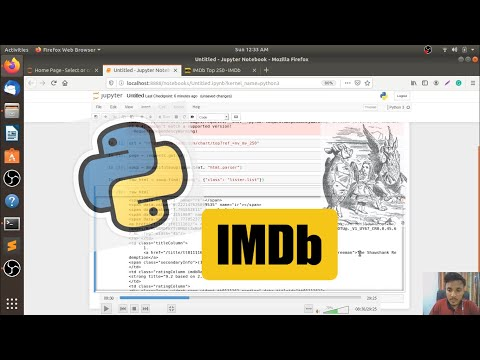

In [ ]:
from IPython.display import YouTubeVideo
display(YouTubeVideo('qstdzOAbt78', width=550, height=310))

### **10. Coletando dados a partir de arquivos CSV**

Um arquivo **CSV** (*Comma Separated Values*) é um tipo de arquivo de texto simples que usa uma estrutura específica para organizar dados tabulares. Por ser um arquivo de texto simples, ele pode conter apenas dados de texto reais - em outras palavras, caracteres ASCII ou Unicode imprimíveis.

A estrutura de um arquivo CSV é fornecida por seu nome. Normalmente, os arquivos CSV usam uma vírgula para separar cada valor de dados específico. Esta é a aparência dessa estrutura:


> **CSV**
---
> column 1 name,column 2 name, column 3 name

> first row data 1,first row data 2,first row data 3

> second row data 1,second row data 2,second row data 3


In [ ]:
import csv

exampleFile = open('/content/example.csv')
exampleReader = csv.reader(exampleFile)
exampleData = list(exampleReader)
exampleData

[['4/5/2014 13:34', 'Apples', '73'],
 ['4/5/2014 3:41', 'Cherries', '85'],
 ['4/6/2014 12:46', 'Pears', '14'],
 ['4/8/2014 8:59', 'Oranges', '52'],
 ['4/10/2014 2:07', 'Apples', '152'],
 ['4/10/2014 18:10', 'Bananas', '23'],
 ['4/10/2014 2:40', 'Strawberries', '98']]

In [ ]:
print (exampleData[0][0] )
print (exampleData[0][1] )
print (exampleData[5][1] )

4/5/2014 13:34
Apples
Bananas


In [ ]:
# reading Data from reader Objects in a for Loop

import csv

exampleFile = open('/content/example.csv')
exampleReader = csv.reader(exampleFile)

for row in exampleReader:
   print('Row #' + str(exampleReader.line_num) + ' ' + str(row))

Row #1 ['4/5/2014 13:34', 'Apples', '73']
Row #2 ['4/5/2014 3:41', 'Cherries', '85']
Row #3 ['4/6/2014 12:46', 'Pears', '14']
Row #4 ['4/8/2014 8:59', 'Oranges', '52']
Row #5 ['4/10/2014 2:07', 'Apples', '152']
Row #6 ['4/10/2014 18:10', 'Bananas', '23']
Row #7 ['4/10/2014 2:40', 'Strawberries', '98']


In [ ]:
import csv

outputFile = open('output.csv', 'w', newline='')
outputWriter = csv.writer(outputFile)

# retorna o numero de caracters gravados
outputWriter.writerow(['spam', 'eggs', 'bacon', 'ham'])

outputWriter.writerow(['Hello, world!', 'eggs', 'bacon', 'ham'])
outputWriter.writerow([1, 2, 3.141592, 4])

outputFile.close()

In [ ]:
import csv
exampleFile = open('/content/exampleWithHeader.csv')
exampleDictReader = csv.DictReader(exampleFile)
for row in exampleDictReader:
  print(row['Timestamp'], row['Fruit'], row['Quantity'])

4/5/2014 13:34 Apples 73
4/5/2014 3:41 Cherries 85
4/6/2014 12:46 Pears 14
4/8/2014 8:59 Oranges 52
4/10/2014 2:07 Apples 152
4/10/2014 18:10 Bananas 23
4/10/2014 2:40 Strawberries 98


In [ ]:
import csv

outputFile = open('output2.csv', 'w', newline='')
outputDictWriter = csv.DictWriter(outputFile, ['Name', 'Pet', 'Phone'])
outputDictWriter.writeheader()
outputDictWriter.writerow({'Name': 'Alice', 'Pet': 'cat', 'Phone': '555-1234'})
outputDictWriter.writerow({'Name': 'Bob', 'Phone': '555-9999'})
outputDictWriter.writerow({'Phone': '555-5555', 'Name': 'Carol', 'Pet':'dog'})

outputFile.close()

In [ ]:
import pandas

df = pandas.read_csv('output2.csv', delimiter=',')
print(df)

    Name  Pet     Phone
0  Alice  cat  555-1234
1    Bob  NaN  555-9999
2  Carol  dog  555-5555


In [ ]:
df.head()

Name  Pet     Phone
0  Alice  cat  555-1234
1    Bob  NaN  555-9999
2  Carol  dog  555-5555

In [ ]:
print(type(df['Name'][0]))

<class 'str'>


In [ ]:
import pandas

df = pandas.read_csv('output2.csv', index_col='Phone')
print(df)


           Name  Pet
Phone               
555-1234  Alice  cat
555-9999    Bob  NaN
555-5555  Carol  dog


In [ ]:
import pandas as pd

df = pandas.read_csv('/content/exampleWithHeader.csv')
print(df)

df2 = df[['Fruit', 'Quantity']]

df2.to_csv('output3.csv')

         Timestamp         Fruit  Quantity
0   4/5/2014 13:34        Apples        73
1    4/5/2014 3:41      Cherries        85
2   4/6/2014 12:46         Pears        14
3    4/8/2014 8:59       Oranges        52
4   4/10/2014 2:07        Apples       152
5  4/10/2014 18:10       Bananas        23
6   4/10/2014 2:40  Strawberries        98


### **11. Extração de dados a partir de *tweets***

In [ ]:
import tweepy as tw
import pandas as pd

In [ ]:
with open('twitter-tokens.txt', 'r') as tfile:
    consumer_key = tfile.readline().strip('\n')
    consumer_secret = tfile.readline().strip('\n')
    access_token = tfile.readline().strip('\n')
    access_token_secret = tfile.readline().strip('\n')

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tw.API(auth)

public_tweets = api.home_timeline()

In [ ]:
for tweet in public_tweets:
    print(tweet.text)

Um pilar da matemática brasileira
Teórico com trabalhos de impacto internacional, Luiz Adauto da Justa Medeiros tam… https://t.co/qlQFu1DqMI
Queimadas podem acelerar o derretimento das geleiras e prejudicar o abastecimento de populações que dependem de sua… https://t.co/NZf7kIYKlD
Peer-to-peer careers advice for research managers by @nikkijforrester https://t.co/8C3EeRfo6E https://t.co/XVZbFdlWIA
What bioRxiv’s first 30,000 preprints reveal about biologists https://t.co/5y86opLprM https://t.co/uJa7mSDeAW
RT @hug_sven: Inspiring new paper by Henry Small

Scientometrics and quantitative studies of science have traditionally avoided epistemolog…
RT @ipoga: Honourable mention here of @LudoWaltman from @QSS_ISSI and @drpeterrodgers from @eLife for being extremely efficient, helpful an…
Comemoração do centenário da Independência do Brasil, em 1922, aconteceu em meio a tensões políticas e marcou o des… https://t.co/bqKbGRXn3p
FAPESP e Sabesp lançam nova chamada de propostas https://t.co/1CHJr

In [ ]:
tweet._json

{'contributors': None,
 'coordinates': None,
 'created_at': 'Mon Jun 20 23:15:00 +0000 2022',
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [{'display_url': 'twitter.com/i/web/status/1…',
    'expanded_url': 'https://twitter.com/i/web/status/1539024043113734144',
    'indices': [94, 117],
    'url': 'https://t.co/ZYR9kLFflW'}],
  'user_mentions': []},
 'favorite_count': 4,
 'favorited': False,
 'geo': None,
 'id': 1539024043113734144,
 'id_str': '1539024043113734144',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'pt',
 'place': None,
 'possibly_sensitive': False,
 'possibly_sensitive_appealable': False,
 'retweet_count': 2,
 'retweeted': False,
 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
 'text': 'Quer saber mais? Assine Pesquisa FAPESP e receba o melhor da pesquisa c

In [ ]:
tweet._json.keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [ ]:
#query_search= "#FAPESP" 
query_search= "#FAPESP"  + " -filter:retweets"

# o curso eh dinamico
cursor_tweets = tw.Cursor( api.search, q = query_search).items(10)

for tweet in cursor_tweets:
    print(tweet.created_at)
    print(tweet.text)

2022-06-21 17:05:28
A postdoctoral position is available at CRID/FMRP-USP, Ribeirao Preto, Brazil. The fellowship is funded by CAPES.… https://t.co/dAjIeh0e7V
2022-06-21 17:00:19
Sebrae-SP e FAPESP vão investir R$ 20 milhões em startups de tecnologia

#SebraeSP #FAPESP #Startup… https://t.co/HWhHbbNPVi
2022-06-21 14:07:00
Especialistas debatem os riscos à #democracia brasileira na 11ª Conferência #FAPESP 60 anos. Evento on-line reunirá… https://t.co/bdXYkzMdGz
2022-06-21 10:00:15
LUVA CRIOGENICA PARA BAIXA TEMPERATURA, PAR, ATE O COTOVELO, TAMANHO MEDIO

Saiba mais:
0800-703-1012… https://t.co/iPAy7bltPk
2022-06-20 18:44:54
“Riscos à #Democracia” será o tema da 11ª Conferência #FAPESP 60 anos, que acontece na próxima quarta-feira, 22 de… https://t.co/soDhETYiSm
2022-06-20 17:44:00
Escola Avançada de #DiplomaciaCientífica e da #Inovação, spin-off de Escola São Paulo de Ciência Avançada realizada… https://t.co/ckwAG7pWia
2022-06-20 17:28:32
Autoreactive T cells/Regulatory T cells. (+)

#

In [ ]:
twkeys = tweet._json.keys()
twkeys

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

In [ ]:
tweets_dict = {}
tweets_dict = tweets_dict.fromkeys(twkeys)
tweets_dict

{'contributors': None,
 'coordinates': None,
 'created_at': None,
 'entities': None,
 'favorite_count': None,
 'favorited': None,
 'geo': None,
 'id': None,
 'id_str': None,
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': None,
 'lang': None,
 'metadata': None,
 'place': None,
 'possibly_sensitive': None,
 'retweet_count': None,
 'retweeted': None,
 'source': None,
 'text': None,
 'truncated': None,
 'user': None}

In [ ]:
query_search= "#ONU"  + " -filter:retweets" 
cursor_tweets = tw.Cursor(api.search,
                          since = "2022-06-20",
                          until = "2022-06-21",
                          q = query_search).items(50)                        

In [ ]:
for tweet in cursor_tweets:
    for key in tweets_dict.keys():
        try:
            twvalue = tweet._json[key]
            tweets_dict[key].append(twvalue)
        except KeyError:
            twvalue = ""
            if(tweets_dict[key] is None):
                tweets_dict[key] = [twvalue]
            else:
                tweets_dict[key].append(twvalue)
        except:
            tweets_dict[key] = [twvalue]
        print("tweets_dict[key]: {} - tweet[key]: {}".format(tweets_dict[key],  twvalue))

tweets_dict[key]: ['Mon Jun 20 23:53:57 +0000 2022'] - tweet[key]: Mon Jun 20 23:53:57 +0000 2022
tweets_dict[key]: [1539033847454629892] - tweet[key]: 1539033847454629892
tweets_dict[key]: ['1539033847454629892'] - tweet[key]: 1539033847454629892
tweets_dict[key]: ['CÓMO.  XUXA. CHILE NO SE DA CUENTA.  TODAS ESTAS.  LETRAS.   ⁉️⁉️ESTÁN. EN. TODA #AMERICA.  DONDE HAN HECHO.  REVOL… https://t.co/n9h0NEcMVX'] - tweet[key]: CÓMO.  XUXA. CHILE NO SE DA CUENTA.  TODAS ESTAS.  LETRAS.   ⁉️⁉️ESTÁN. EN. TODA #AMERICA.  DONDE HAN HECHO.  REVOL… https://t.co/n9h0NEcMVX
tweets_dict[key]: [True] - tweet[key]: True
tweets_dict[key]: [{'hashtags': [{'text': 'AMERICA', 'indices': [81, 89]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/n9h0NEcMVX', 'expanded_url': 'https://twitter.com/i/web/status/1539033847454629892', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}] - tweet[key]: {'hashtags': [{'text': 'AMERICA', 'indices': [81, 89]}], 'symbols': [], 'use

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
tweets_dict

{'contributors': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 'coordinates': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 'created_at': ['Mon Jun 20 23:53:57 +0000 2022',
  'Mon Jun 20 23:49:09 +0000 2022',
  'Mon Jun 20 23:38:55 +0000 2022',
  'Mon Jun 20 23:36:41 +0000 2022',
  'Mon Ju

In [ ]:
dfTweets = pd.DataFrame.from_dict(tweets_dict)
dfTweets.head()

created_at                   id               id_str  \
0  Mon Jun 20 23:53:57 +0000 2022  1539033847454629892  1539033847454629892   
1  Mon Jun 20 23:49:09 +0000 2022  1539032636550791169  1539032636550791169   
2  Mon Jun 20 23:38:55 +0000 2022  1539030064263843841  1539030064263843841   
3  Mon Jun 20 23:36:41 +0000 2022  1539029499882389506  1539029499882389506   
4  Mon Jun 20 23:33:00 +0000 2022  1539028573104656384  1539028573104656384   

                                                text  truncated  \
0  CÓMO.  XUXA. CHILE NO SE DA CUENTA.  TODAS EST...       True   
1  #ONU Journée de conférences pour les auditeurs...       True   
2  Las personas refugiadas son aquellas que se ha...       True   
3  @ivanlimamagne Áñez es inocente hasta en la #O...      False   
4  #Internacionales | #ONU pide resolver conflict...       True   

                                            entities  \
0  {'hashtags': [{'text': 'AMERICA', 'indices': [...   
1  {'hashtags': [{'text': 'ONU', 'indices': [0, 4...   
2  {'hashtags': [], 'symbols': [], 'user_mentions...   
3  {'hashtags': [{'text': 'ONU', 'indices': [44, ...   
4  {'hashtags': [{'text': 'Internacionales', 'ind...   

                                            metadata  \
0  {'iso_language_code': 'es', 'result_type': 're...   
1  {'iso_language_code': 'fr', 'result_type': 're...   
2  {'iso_language_code': 'es', 'result_type': 're...   
3  {'iso_language_code': 'es', 'result_type': 're...   
4  {'iso_language_code': 'es', 'result_type': 're...   

                                              source  in_reply_to_status_id  \
0  <a href="http://twitter.com/download/iphone" r...                    NaN   
1  <a href="http://twitter.com/download/iphone" r...                    NaN   
2  <a href="https://mobile.twitter.com" rel="nofo...                    NaN   
3  <a href="https://mobile.twitter.com" rel="nofo...           1.539026e+18   
4  <a href="https://about.twitter.com/products/tw...                    NaN   

  in_reply_to_status_id_str  ...  coordinates place contributors  \
0                      None  ...         None  None         None   
1                      None  ...         None  None         None   
2                      None  ...         None  None         None   
3       1539026187976118282  ...         None  None         None   
4                      None  ...         None  None         None   

  is_quote_status retweet_count favorite_count favorited retweeted  \
0           False             0              0     False     False   
1           False             2             40     False     False   
2           False             0              0     False     False   
3           False             0              0     False     False   
4           False             0              1     False     False   

   possibly_sensitive  lang  
0               False    es  
1               False    fr  
2               False    es  
3                        es  
4               False    es  

[5 rows x 25 columns]

In [ ]:
dfTweets.text

0     CÓMO.  XUXA. CHILE NO SE DA CUENTA.  TODAS EST...
1     #ONU Journée de conférences pour les auditeurs...
2     Las personas refugiadas son aquellas que se ha...
3     @ivanlimamagne Áñez es inocente hasta en la #O...
4     #Internacionales | #ONU pide resolver conflict...
5     @EjeCentral Conceden asilo político y "naciona...
6     #Salud De acuerdo con la ONU, son más de 200 l...
7     La Alta Comisionada de la #ONU, @mbachelet, se...
8     📡Las mentiras de occidente ya no cuelan👉 La #U...
9     #BREAKING Comenzó semana de la moda en Moscú. ...
10    #CubaInforma | La población mundial de refugia...
11    #DéthiéFall, #MameDiarraFam et #AhmedAïdara pl...
12    #Myanmar #ONU #DerechosHumanos #LibertadDeExpr...
13    Venezuela presente en conferencia sobre Tratad...
14    #Internacionales | #ONU pide resolver conflict...
15    Cuba présente un nouveau projet de résolution ...
16    🇺🇳 Communiqué de presse du #Conseil de sécurit...
17    #Rusia no es ni buena ni adorable. Ella es

In [ ]:
dfTweets.to_csv("tweetsCSV.csv", index=False)

In [ ]:
import pandas as pd

df = pd.read_csv("tweetsCSV.csv")
df

created_at                   id               id_str  \
0   Mon Jun 20 23:53:57 +0000 2022  1539033847454629892  1539033847454629892   
1   Mon Jun 20 23:49:09 +0000 2022  1539032636550791169  1539032636550791169   
2   Mon Jun 20 23:38:55 +0000 2022  1539030064263843841  1539030064263843841   
3   Mon Jun 20 23:36:41 +0000 2022  1539029499882389506  1539029499882389506   
4   Mon Jun 20 23:33:00 +0000 2022  1539028573104656384  1539028573104656384   
5   Mon Jun 20 23:29:51 +0000 2022  1539027782117666817  1539027782117666817   
6   Mon Jun 20 23:22:00 +0000 2022  1539025804700418049  1539025804700418049   
7   Mon Jun 20 23:20:08 +0000 2022  1539025337492901890  1539025337492901890   
8   Mon Jun 20 23:19:14 +0000 2022  1539025108366503941  1539025108366503941   
9   Mon Jun 20 23:03:00 +0000 2022  1539021023491891200  1539021023491891200   
10  Mon Jun 20 22:58:54 +0000 2022  1539019992104050689  1539019992104050689   
11  Mon Jun 20 22:51:38 +0000 2022  1539018165828591618  1539018165828591618   
12  Mon Jun 20 22:49:48 +0000 2022  1539017700843868160  1539017700843868160   
13  Mon Jun 20 22:34:17 +0000 2022  1539013796945174528  1539013796945174528   
14  Mon Jun 20 22:33:00 +0000 2022  1539013473664786432  1539013473664786432   
15  Mon Jun 20 22:31:48 +0000 2022  1539013170618146817  1539013170618146817   
16  Mon Jun 20 22:25:51 +0000 2022  1539011674392371200  1539011674392371200   
17  Mon Jun 20 22:25:43 +0000 2022  1539011643513896962  1539011643513896962   
18  Mon Jun 20 22:24:51 +0000 2022  1539011423707201537  1539011423707201537   
19  Mon Jun 20 22:20:07 +0000 2022  1539010232894033927  1539010232894033927   
20  Mon Jun 20 22:17:42 +0000 2022  1539009624086650893  1539009624086650893   
21  Mon Jun 20 22:17:08 +0000 2022  1539009480247201800  1539009480247201800   
22  Mon Jun 20 22:16:38 +0000 2022  1539009355051327490  1539009355051327490   
23  Mon Jun 20 22:12:37 +0000 2022  1539008343208886272  1539008343208886272   
24  Mon Jun 20 22:10:16 +0000 2022  1539007752630157314  1539007752630157314   
25  Mon Jun 20 22:10:09 +0000 2022  1539007723131617281  1539007723131617281   
26  Mon Jun 20 22:07:26 +0000 2022  1539007039032250368  1539007039032250368   
27  Mon Jun 20 22:01:00 +0000 2022  1539005420995497988  1539005420995497988   
28  Mon Jun 20 22:01:00 +0000 2022  1539005419917660172  1539005419917660172   
29  Mon Jun 20 21:53:09 +0000 2022  1539003447596527616  1539003447596527616   
30  Mon Jun 20 21:50:38 +0000 2022  1539002812985663488  1539002812985663488   
31  Mon Jun 20 21:50:03 +0000 2022  1539002665082011650  1539002665082011650   
32  Mon Jun 20 21:49:46 +0000 2022  1539002594298929154  1539002594298929154   
33  Mon Jun 20 21:49:28 +0000 2022  1539002517832577024  1539002517832577024   
34  Mon Jun 20 21:48:27 +0000 2022  1539002263611531265  1539002263611531265   
35  Mon Jun 20 21:46:44 +0000 2022  1539001830964965377  1539001830964965377   
36  Mon Jun 20 21:40:07 +0000 2022  1539000165029269504  1539000165029269504   
37  Mon Jun 20 21:35:50 +0000 2022  1538999089571962880  1538999089571962880   
38  Mon Jun 20 21:32:00 +0000 2022  1538998122415800343  1538998122415800343   
39  Mon Jun 20 21:31:42 +0000 2022  1538998049980051457  1538998049980051457   
40  Mon Jun 20 21:30:00 +0000 2022  1538997621108264960  1538997621108264960   
41  Mon Jun 20 21:29:33 +0000 2022  1538997508751380481  1538997508751380481   
42  Mon Jun 20 21:29:16 +0000 2022  1538997436881969152  1538997436881969152   
43  Mon Jun 20 21:28:19 +0000 2022  1538997195491487744  1538997195491487744   
44  Mon Jun 20 21:26:24 +0000 2022  1538996713721061379  1538996713721061379   
45  Mon Jun 20 21:25:39 +0000 2022  1538996525224820736  1538996525224820736   
46  Mon Jun 20 21:24:32 +0000 2022  1538996246370783232  1538996246370783232   
47  Mon Jun 20 21:21:14 +0000 2022  1538995415206481921  1538995415206481921   
48  Mon Jun 20 21:20:04 +0000 2022  1538995118807588865  1538995118807588865   
49  Mon Jun 20 21:16:08 

In [ ]:
# likes
df.sort_values(by=['favorite_count'], ascending=False)

created_at                   id               id_str  \
1   Mon Jun 20 23:49:09 +0000 2022  1539032636550791169  1539032636550791169   
32  Mon Jun 20 21:49:46 +0000 2022  1539002594298929154  1539002594298929154   
7   Mon Jun 20 23:20:08 +0000 2022  1539025337492901890  1539025337492901890   
8   Mon Jun 20 23:19:14 +0000 2022  1539025108366503941  1539025108366503941   
34  Mon Jun 20 21:48:27 +0000 2022  1539002263611531265  1539002263611531265   
23  Mon Jun 20 22:12:37 +0000 2022  1539008343208886272  1539008343208886272   
45  Mon Jun 20 21:25:39 +0000 2022  1538996525224820736  1538996525224820736   
10  Mon Jun 20 22:58:54 +0000 2022  1539019992104050689  1539019992104050689   
35  Mon Jun 20 21:46:44 +0000 2022  1539001830964965377  1539001830964965377   
31  Mon Jun 20 21:50:03 +0000 2022  1539002665082011650  1539002665082011650   
13  Mon Jun 20 22:34:17 +0000 2022  1539013796945174528  1539013796945174528   
44  Mon Jun 20 21:26:24 +0000 2022  1538996713721061379  1538996713721061379   
27  Mon Jun 20 22:01:00 +0000 2022  1539005420995497988  1539005420995497988   
46  Mon Jun 20 21:24:32 +0000 2022  1538996246370783232  1538996246370783232   
5   Mon Jun 20 23:29:51 +0000 2022  1539027782117666817  1539027782117666817   
30  Mon Jun 20 21:50:38 +0000 2022  1539002812985663488  1539002812985663488   
41  Mon Jun 20 21:29:33 +0000 2022  1538997508751380481  1538997508751380481   
37  Mon Jun 20 21:35:50 +0000 2022  1538999089571962880  1538999089571962880   
22  Mon Jun 20 22:16:38 +0000 2022  1539009355051327490  1539009355051327490   
43  Mon Jun 20 21:28:19 +0000 2022  1538997195491487744  1538997195491487744   
19  Mon Jun 20 22:20:07 +0000 2022  1539010232894033927  1539010232894033927   
16  Mon Jun 20 22:25:51 +0000 2022  1539011674392371200  1539011674392371200   
14  Mon Jun 20 22:33:00 +0000 2022  1539013473664786432  1539013473664786432   
9   Mon Jun 20 23:03:00 +0000 2022  1539021023491891200  1539021023491891200   
6   Mon Jun 20 23:22:00 +0000 2022  1539025804700418049  1539025804700418049   
4   Mon Jun 20 23:33:00 +0000 2022  1539028573104656384  1539028573104656384   
40  Mon Jun 20 21:30:00 +0000 2022  1538997621108264960  1538997621108264960   
42  Mon Jun 20 21:29:16 +0000 2022  1538997436881969152  1538997436881969152   
39  Mon Jun 20 21:31:42 +0000 2022  1538998049980051457  1538998049980051457   
38  Mon Jun 20 21:32:00 +0000 2022  1538998122415800343  1538998122415800343   
36  Mon Jun 20 21:40:07 +0000 2022  1539000165029269504  1539000165029269504   
47  Mon Jun 20 21:21:14 +0000 2022  1538995415206481921  1538995415206481921   
48  Mon Jun 20 21:20:04 +0000 2022  1538995118807588865  1538995118807588865   
0   Mon Jun 20 23:53:57 +0000 2022  1539033847454629892  1539033847454629892   
25  Mon Jun 20 22:10:09 +0000 2022  1539007723131617281  1539007723131617281   
33  Mon Jun 20 21:49:28 +0000 2022  1539002517832577024  1539002517832577024   
29  Mon Jun 20 21:53:09 +0000 2022  1539003447596527616  1539003447596527616   
28  Mon Jun 20 22:01:00 +0000 2022  1539005419917660172  1539005419917660172   
26  Mon Jun 20 22:07:26 +0000 2022  1539007039032250368  1539007039032250368   
24  Mon Jun 20 22:10:16 +0000 2022  1539007752630157314  1539007752630157314   
21  Mon Jun 20 22:17:08 +0000 2022  1539009480247201800  1539009480247201800   
20  Mon Jun 20 22:17:42 +0000 2022  1539009624086650893  1539009624086650893   
18  Mon Jun 20 22:24:51 +0000 2022  1539011423707201537  1539011423707201537   
17  Mon Jun 20 22:25:43 +0000 2022  1539011643513896962  1539011643513896962   
15  Mon Jun 20 22:31:48 +0000 2022  1539013170618146817  1539013170618146817   
12  Mon Jun 20 22:49:48 +0000 2022  1539017700843868160  1539017700843868160   
11  Mon Jun 20 22:51:38 +0000 2022  1539018165828591618  1539018165828591618   
3   Mon Jun 20 23:36:41 +0000 2022  1539029499882389506  1539029499882389506   
2   Mon Jun 20 23:38:55 +0000 2022  1539030064263843841  1539030064263843841   
49  Mon Jun 20 21:16:08 

In [ ]:
df.text

0     CÓMO.  XUXA. CHILE NO SE DA CUENTA.  TODAS EST...
1     #ONU Journée de conférences pour les auditeurs...
2     Las personas refugiadas son aquellas que se ha...
3     @ivanlimamagne Áñez es inocente hasta en la #O...
4     #Internacionales | #ONU pide resolver conflict...
5     @EjeCentral Conceden asilo político y "naciona...
6     #Salud De acuerdo con la ONU, son más de 200 l...
7     La Alta Comisionada de la #ONU, @mbachelet, se...
8     📡Las mentiras de occidente ya no cuelan👉 La #U...
9     #BREAKING Comenzó semana de la moda en Moscú. ...
10    #CubaInforma | La población mundial de refugia...
11    #DéthiéFall, #MameDiarraFam et #AhmedAïdara pl...
12    #Myanmar #ONU #DerechosHumanos #LibertadDeExpr...
13    Venezuela presente en conferencia sobre Tratad...
14    #Internacionales | #ONU pide resolver conflict...
15    Cuba présente un nouveau projet de résolution ...
16    🇺🇳 Communiqué de presse du #Conseil de sécurit...
17    #Rusia no es ni buena ni adorable. Ella es

**Referência**:

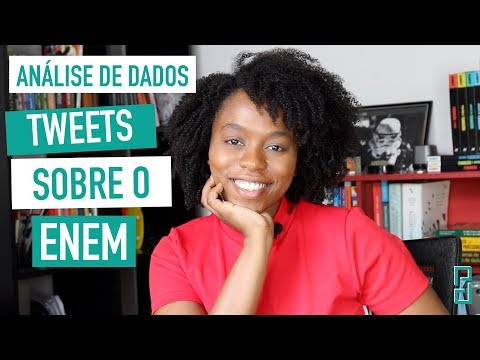

In [ ]:
from IPython.display import YouTubeVideo
display(YouTubeVideo('RssGfmtyn4A', width=550, height=310))

### **12. Coletando dados a partir de planilhas do Google**

In [ ]:
# https://gspread.readthedocs.io/en/latest/user-guide.html

# instalar a biblioteca gspread 
!pip install --upgrade gspread

# --upgrade -> instala a versao mais recente

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
planilha = gc.open('municipios')

In [ ]:
pagina = planilha.sheet1
pagina.row_values(1)

['codigo_ibge', 'nome', 'latitude', 'longitude', 'capitAl', 'codigo_uf']

In [ ]:
pagina.acell('A1').value

'codigo_ibge'

In [ ]:
pagina.cell(1,5).value

'capitAl'

In [ ]:
pagina.update('G1','TESTE')

# apagar
pagina.update('G1','')

{'spreadsheetId': '1A3LgNatMTy6SH8IarzAHW_-T3IZ6yUMcoOZld9AGSJU',
 'updatedCells': 1,
 'updatedColumns': 1,
 'updatedRange': 'dados!G1',
 'updatedRows': 1}

In [ ]:
import pandas as pd

municipios = pd.DataFrame(pagina.get_all_records())
municipios.head()

codigo_ibge                 nome  latitude  longitude  capitAl  codigo_uf
0      5200050      Abadia de Goiás  -167.573   -494.412        0         52
1      3100104  Abadia dos Dourados  -184.831   -473.916        0         31
2      5200100            Abadiânia   -16.197   -487.057        0         52
3      3100203               Abaeté  -191.551   -454.444        0         31
4      1500107           Abaetetuba  -172.183   -488.788        0         15

In [ ]:
rondonia = municipios.query('codigo_uf==11')
rondonia.head()

codigo_ibge                     nome  latitude  longitude  capitAl  \
131      1100015    Alta Floresta D'Oeste  -119.283   -619.953        0   
145      1100379  Alto Alegre dos Parecis   -12.132    -61.835        0   
158      1100403             Alto Paraíso  -971.429   -633.188        0   
179      1100346         Alvorada D'Oeste  -113.463   -622.847        0   
381      1100023                Ariquemes  -990.571   -630.325        0   

     codigo_uf  
131         11  
145         11  
158         11  
179         11  
381         11

In [ ]:
# obter o numero de linhas e colunas
rondonia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 131 to 5517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   codigo_ibge  52 non-null     int64  
 1   nome         52 non-null     object 
 2   latitude     52 non-null     float64
 3   longitude    52 non-null     float64
 4   capitAl      52 non-null     int64  
 5   codigo_uf    52 non-null     int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 2.8+ KB


In [ ]:
# cria uma pagina
municipios_rondonia = planilha.add_worksheet('Rondônia',rows=52, cols=6)

In [ ]:
municipios_rondonia.update([rondonia.columns.values.tolist()] + rondonia.values.tolist())

{'spreadsheetId': '1A3LgNatMTy6SH8IarzAHW_-T3IZ6yUMcoOZld9AGSJU',
 'updatedCells': 318,
 'updatedColumns': 6,
 'updatedRange': "'Rondônia'!A1:F53",
 'updatedRows': 53}

In [ ]:
rondonia.columns.values.tolist()

['codigo_ibge', 'nome', 'latitude', 'longitude', 'capitAl', 'codigo_uf']

In [ ]:
rondonia.values.tolist()

[[1100015, "Alta Floresta D'Oeste", -119.283, -619.953, 0, 11],
 [1100379, 'Alto Alegre dos Parecis', -12.132, -61.835, 0, 11],
 [1100403, 'Alto Paraíso', -971.429, -633.188, 0, 11],
 [1100346, "Alvorada D'Oeste", -113.463, -622.847, 0, 11],
 [1100023, 'Ariquemes', -990.571, -630.325, 0, 11],
 [1100452, 'Buritis', -101.943, -638.324, 0, 11],
 [1100031, 'Cabixi', -134.945, -60.552, 0, 11],
 [1100601, 'Cacaulândia', -10.349, -629.043, 0, 11],
 [1100049, 'Cacoal', -114.343, -614.562, 0, 11],
 [1100700, 'Campo Novo de Rondônia', -105.712, -636.266, 0, 11],
 [1100809, 'Candeias do Jamari', -87.907, -637.005, 0, 11],
 [1100908, 'Castanheiras', -114.253, -619.482, 0, 11],
 [1100056, 'Cerejeiras', -13.187, -608.168, 0, 11],
 [1100924, 'Chupinguaia', -125.611, -608.877, 0, 11],
 [1100064, 'Colorado do Oeste', -131.174, -605.454, 0, 11],
 [1100072, 'Corumbiara', -129.551, -608.947, 0, 11],
 [1100080, 'Costa Marques', -124.367, -64.228, 0, 11],
 [1100940, 'Cujubim', -936.065, -625.846, 0, 11],
 [

**Referência**:

Analise DADOS do Google Sheets com Python usando Google COLAB

https://youtu.be/8vKvsLTLDzs

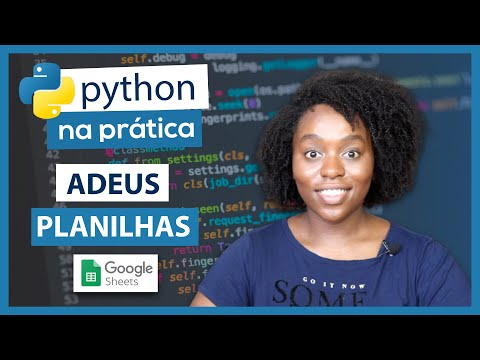

In [ ]:
from IPython.display import YouTubeVideo
display(YouTubeVideo('8vKvsLTLDzs', width=550, height=310))

### **13. Coletando dados eleitorais**

Lendo um arquivo **CSV** a partir do **Google Drive**

>

**Repositório de dados eleitorais**:

> https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

cand_BR = pd.read_csv("/content/drive/My Drive/Colab Notebooks/PLN/Aula 04/consulta_cand_2020_BRASIL.csv", sep=';', encoding='ISO-8859-1')
cand_BR

DT_GERACAO HH_GERACAO  ANO_ELEICAO  CD_TIPO_ELEICAO  \
0       18/10/2020   12:07:25         2020                2   
1       18/10/2020   12:07:25         2020                2   
2       18/10/2020   12:07:25         2020                2   
3       18/10/2020   12:07:25         2020                2   
4       18/10/2020   12:07:25         2020                2   
...            ...        ...          ...              ...   
554973  18/10/2020   12:07:25         2020                2   
554974  18/10/2020   12:07:25         2020                2   
554975  18/10/2020   12:07:25         2020                2   
554976  18/10/2020   12:07:25         2020                2   
554977  18/10/2020   12:07:25         2020                2   

          NM_TIPO_ELEICAO  NR_TURNO  CD_ELEICAO                DS_ELEICAO  \
0       ELEIÇÃO ORDINÁRIA         1         426  Eleições Municipais 2020   
1       ELEIÇÃO ORDINÁRIA         1         426  Eleições Municipais 2020   
2       ELEIÇÃO ORDINÁRIA         1         426  Eleições Municipais 2020   
3       ELEIÇÃO ORDINÁRIA         1         426  Eleições Municipais 2020   
4       ELEIÇÃO ORDINÁRIA         1         426  Eleições Municipais 2020   
...                   ...       ...         ...                       ...   
554973  ELEIÇÃO ORDINÁRIA         1         426  Eleições Municipais 2020   
554974  ELEIÇÃO ORDINÁRIA         1         426  Eleições Municipais 2020   
554975  ELEIÇÃO ORDINÁRIA         1         426  Eleições Municipais 2020   
554976  ELEIÇÃO ORDINÁRIA         1         426  Eleições Municipais 2020   
554977  ELEIÇÃO ORDINÁRIA         1         426  Eleições Municipais 2020   

        DT_ELEICAO TP_ABRANGENCIA  ... DS_SIT_TOT_TURNO  ST_REELEICAO  \
0       15/11/2020      MUNICIPAL  ...           #NULO#             N   
1       15/11/2020      MUNICIPAL  ...           #NULO#             N   
2       15/11/2020      MUNICIPAL  ...           #NULO#             N   
3       15/11/2020      MUNICIPAL  ...           #NULO#             N   
4       15/11/2020      MUNICIPAL  ...           #NULO#             N   
...            ...            ...  ...              ...           ...   
554973  15/11/2020      MUNICIPAL  ...           #NULO#             N   
554974  15/11/2020      MUNICIPAL  ...           #NULO#             N   
554975  15/11/2020      MUNICIPAL  ...           #NULO#             N   
554976  15/11/2020      MUNICIPAL  ...           #NULO#             N   
554977  15/11/2020      MUNICIPAL  ...           #NULO#             N   

       ST_DECLARAR_BENS  NR_PROTOCOLO_CANDIDATURA          NR_PROCESSO  \
0                     S                        -1  6001506220206260077   
1                     S                        -1  6003406920206260224   
2                     S                        -1  6004228620206260358   
3                     S                        -1  6001241720206160118   
4                     S                        -1  6001727220206100043   
...                 ...                       ...                  ...   
554973                S                        -1  6005534820206140050   
554974                S                        -1  6000608920206140044   
554975                S                        -1  6002406820206240031   
554976                S                        -1  6003974820206260140   
554977                S                        -1  6002998120206260037   

        CD_SITUACAO_CANDIDATO_PLEITO  DS_SITUACAO_CANDIDATO_PLEITO  \
0                                 -1                        #NULO#   
1                                 -1                        #NULO#   
2                                 -1                        #NULO#   
3                                 -1                        #NULO#   
4                                 -1                        #NULO#   
...                              ...                           ...   
554973                            -1                        #NULO#   


In [ ]:
cand_BR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554978 entries, 0 to 554977
Data columns (total 63 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   DT_GERACAO                     554978 non-null  object
 1   HH_GERACAO                     554978 non-null  object
 2   ANO_ELEICAO                    554978 non-null  int64 
 3   CD_TIPO_ELEICAO                554978 non-null  int64 
 4   NM_TIPO_ELEICAO                554978 non-null  object
 5   NR_TURNO                       554978 non-null  int64 
 6   CD_ELEICAO                     554978 non-null  int64 
 7   DS_ELEICAO                     554978 non-null  object
 8   DT_ELEICAO                     554978 non-null  object
 9   TP_ABRANGENCIA                 554978 non-null  object
 10  SG_UF                          554978 non-null  object
 11  SG_UE                          554978 non-null  int64 
 12  NM_UE                          554978 non-nu

In [ ]:
cand_BR['ST_REELEICAO'].value_counts()

N    531316
S     23662
Name: ST_REELEICAO, dtype: int64

In [ ]:
# porcentagem em decimal
cand_BR['ST_REELEICAO'].value_counts(normalize=True)

N    0.957364
S    0.042636
Name: ST_REELEICAO, dtype: float64

In [ ]:
# porcentagem
cand_BR['ST_REELEICAO'].value_counts(normalize=True)*100

N    95.736408
S     4.263592
Name: ST_REELEICAO, dtype: float64

In [ ]:
cand_BR['DS_GRAU_INSTRUCAO'].value_counts(normalize=True)

ENSINO MÉDIO COMPLETO            0.381033
SUPERIOR COMPLETO                0.243044
ENSINO FUNDAMENTAL INCOMPLETO    0.127816
ENSINO FUNDAMENTAL COMPLETO      0.122097
ENSINO MÉDIO INCOMPLETO          0.049634
SUPERIOR INCOMPLETO              0.044782
LÊ E ESCREVE                     0.031562
ANALFABETO                       0.000032
Name: DS_GRAU_INSTRUCAO, dtype: float64

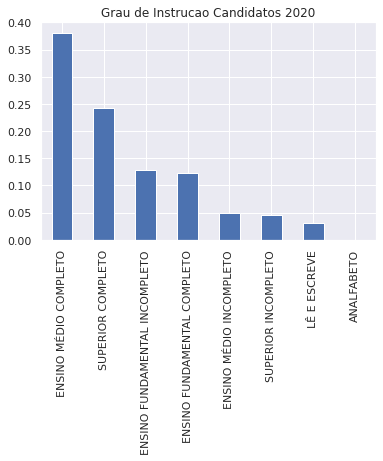

In [ ]:
import seaborn as sns
sns.set()

# use ;
cand_BR['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).plot(kind='bar', title='Grau de Instrucao Candidatos 2020');

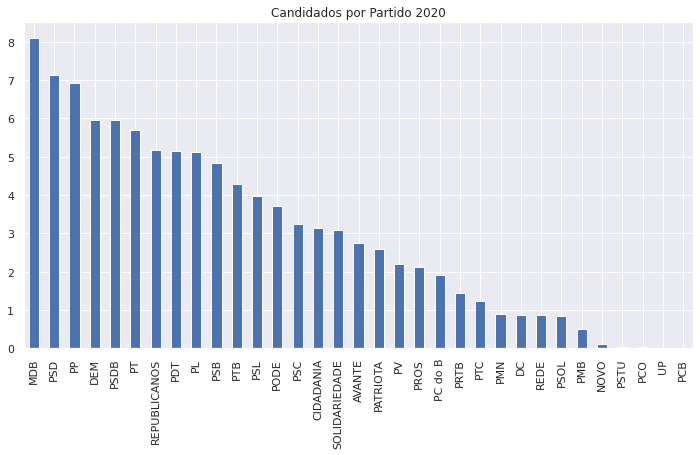

In [ ]:
(100 * cand_BR['SG_PARTIDO'].value_counts(normalize=True)).plot(kind='bar', figsize=(12,6), title='Candidados por Partido 2020');

In [ ]:
cand_BR['NM_URNA_CANDIDATO'].str.contains('BOLSONARO').value_counts()

False    554886
True         89
Name: NM_URNA_CANDIDATO, dtype: int64

In [ ]:
cand_BR[cand_BR['NM_URNA_CANDIDATO'].str.contains('BOLSONARO') == True]

DT_GERACAO HH_GERACAO  ANO_ELEICAO  CD_TIPO_ELEICAO  \
5634    18/10/2020   12:07:25         2020                2   
10253   18/10/2020   12:07:25         2020                2   
10434   18/10/2020   12:07:25         2020                2   
12176   18/10/2020   12:07:25         2020                2   
14901   18/10/2020   12:07:25         2020                2   
...            ...        ...          ...              ...   
531091  18/10/2020   12:07:25         2020                2   
545973  18/10/2020   12:07:25         2020                2   
549827  18/10/2020   12:07:25         2020                2   
552845  18/10/2020   12:07:25         2020                2   
554656  18/10/2020   12:07:25         2020                2   

          NM_TIPO_ELEICAO  NR_TURNO  CD_ELEICAO                DS_ELEICAO  \
5634    ELEIÇÃO ORDINÁRIA         1         426  Eleições Municipais 2020   
10253   ELEIÇÃO ORDINÁRIA         1         426  Eleições Municipais 2020   
10434   ELEIÇÃO ORDINÁRIA         1         426  Eleições Municipais 2020   
12176   ELEIÇÃO ORDINÁRIA         1         426  Eleições Municipais 2020   
14901   ELEIÇÃO ORDINÁRIA         1         426  Eleições Municipais 2020   
...                   ...       ...         ...                       ...   
531091  ELEIÇÃO ORDINÁRIA         1         426  Eleições Municipais 2020   
545973  ELEIÇÃO ORDINÁRIA         1         426  Eleições Municipais 2020   
549827  ELEIÇÃO ORDINÁRIA         1         426  Eleições Municipais 2020   
552845  ELEIÇÃO ORDINÁRIA         1         426  Eleições Municipais 2020   
554656  ELEIÇÃO ORDINÁRIA         1         426  Eleições Municipais 2020   

        DT_ELEICAO TP_ABRANGENCIA  ... DS_SIT_TOT_TURNO  ST_REELEICAO  \
5634    15/11/2020      MUNICIPAL  ...           #NULO#             N   
10253   15/11/2020      MUNICIPAL  ...           #NULO#             N   
10434   15/11/2020      MUNICIPAL  ...           #NULO#             N   
12176   15/11/2020      MUNICIPAL  ...           #NULO#             N   
14901   15/11/2020      MUNICIPAL  ...           #NULO#             N   
...            ...            ...  ...              ...           ...   
531091  15/11/2020      MUNICIPAL  ...           #NULO#             N   
545973  15/11/2020      MUNICIPAL  ...           #NULO#             N   
549827  15/11/2020      MUNICIPAL  ...           #NULO#             N   
552845  15/11/2020      MUNICIPAL  ...           #NULO#             N   
554656  15/11/2020      MUNICIPAL  ...           #NULO#             N   

       ST_DECLARAR_BENS  NR_PROTOCOLO_CANDIDATURA          NR_PROCESSO  \
5634                  S                        -1  6001461220206240067   
10253                 N                        -1  6004444820206160092   
10434                 S                        -1  6001586820206190195   
12176                 N                        -1  6001593120206100057   
14901                 S                        -1  6004538620206160002   
...                 ...                       ...                  ...   
531091                S                        -1  6002720520206240086   
545973                S                        -1  6004222020206250001   
549827                S                        -1  6002166020206230001   
552845                N                        -1  6003610520206260108   
554656                S                        -1  6002771220206130093   

        CD_SITUACAO_CANDIDATO_PLEITO  DS_SITUACAO_CANDIDATO_PLEITO  \
5634                              -1                        #NULO#   
10253                             -1                        #NULO#   
10434                             -1                        #NULO#   
12176                             -1                        #NULO#   
14901                             -1                        #NULO#   
...                              ...                           ...   
531091                            -1                        #NULO#   


In [ ]:
cand_RJ = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PLN/Aula 04/consulta_cand_2020_RJ.csv", sep=';', encoding='ISO-8859-1')
cand_RJ

DT_GERACAO HH_GERACAO  ANO_ELEICAO  CD_TIPO_ELEICAO    NM_TIPO_ELEICAO  \
0      18/10/2020   12:07:25         2020                2  ELEIÇÃO ORDINÁRIA   
1      18/10/2020   12:07:25         2020                2  ELEIÇÃO ORDINÁRIA   
2      18/10/2020   12:07:25         2020                2  ELEIÇÃO ORDINÁRIA   
3      18/10/2020   12:07:25         2020                2  ELEIÇÃO ORDINÁRIA   
4      18/10/2020   12:07:25         2020                2  ELEIÇÃO ORDINÁRIA   
...           ...        ...          ...              ...                ...   
26347  18/10/2020   12:07:25         2020                2  ELEIÇÃO ORDINÁRIA   
26348  18/10/2020   12:07:25         2020                2  ELEIÇÃO ORDINÁRIA   
26349  18/10/2020   12:07:25         2020                2  ELEIÇÃO ORDINÁRIA   
26350  18/10/2020   12:07:25         2020                2  ELEIÇÃO ORDINÁRIA   
26351  18/10/2020   12:07:25         2020                2  ELEIÇÃO ORDINÁRIA   

       NR_TURNO  CD_ELEICAO                DS_ELEICAO  DT_ELEICAO  \
0             1         426  Eleições Municipais 2020  15/11/2020   
1             1         426  Eleições Municipais 2020  15/11/2020   
2             1         426  Eleições Municipais 2020  15/11/2020   
3             1         426  Eleições Municipais 2020  15/11/2020   
4             1         426  Eleições Municipais 2020  15/11/2020   
...         ...         ...                       ...         ...   
26347         1         426  Eleições Municipais 2020  15/11/2020   
26348         1         426  Eleições Municipais 2020  15/11/2020   
26349         1         426  Eleições Municipais 2020  15/11/2020   
26350         1         426  Eleições Municipais 2020  15/11/2020   
26351         1         426  Eleições Municipais 2020  15/11/2020   

      TP_ABRANGENCIA  ... DS_SIT_TOT_TURNO  ST_REELEICAO ST_DECLARAR_BENS  \
0          MUNICIPAL  ...           #NULO#             N                S   
1          MUNICIPAL  ...           #NULO#             N                S   
2          MUNICIPAL  ...           #NULO#             N                S   
3          MUNICIPAL  ...           #NULO#             N                S   
4          MUNICIPAL  ...           #NULO#             N                S   
...              ...  ...              ...           ...              ...   
26347      MUNICIPAL  ...           #NULO#             N                S   
26348      MUNICIPAL  ...           #NULO#             N                S   
26349      MUNICIPAL  ...           #NULO#             N                S   
26350      MUNICIPAL  ...           #NULO#             N                S   
26351      MUNICIPAL  ...           #NULO#             N                N   

       NR_PROTOCOLO_CANDIDATURA          NR_PROCESSO  \
0                            -1  6001811420206190195   
1                            -1  6001643120206190048   
2                            -1  6002222220206190149   
3                            -1  6001733520206190034   
4                            -1  6002027520206190102   
...                         ...                  ...   
26347                        -1  6002191520206190037   
26348                        -1  6003571120206190092   
26349                        -1  6016226120206190023   
26350                        -1  6002155120206190045   
26351                        -1  6003522120206190146   

       CD_SITUACAO_CANDIDATO_PLEITO  DS_SITUACAO_CANDIDATO_PLEITO  \
0                                -1                        #NULO#   
1                                -1                        #NULO#   
2                                -1                        #NULO#   
3                                -1                        #NULO#   
4                                -1                        #NULO#   
...                             ...                           ...   
26347                            -1                        #NULO#   
26348                            -1                    

In [ ]:
cand_RJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26352 entries, 0 to 26351
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   DT_GERACAO                     26352 non-null  object
 1   HH_GERACAO                     26352 non-null  object
 2   ANO_ELEICAO                    26352 non-null  int64 
 3   CD_TIPO_ELEICAO                26352 non-null  int64 
 4   NM_TIPO_ELEICAO                26352 non-null  object
 5   NR_TURNO                       26352 non-null  int64 
 6   CD_ELEICAO                     26352 non-null  int64 
 7   DS_ELEICAO                     26352 non-null  object
 8   DT_ELEICAO                     26352 non-null  object
 9   TP_ABRANGENCIA                 26352 non-null  object
 10  SG_UF                          26352 non-null  object
 11  SG_UE                          26352 non-null  int64 
 12  NM_UE                          26352 non-null  object
 13  C

In [ ]:
cand_RJ['ST_REELEICAO'].value_counts(normalize=True)*100

N    97.931846
S     2.068154
Name: ST_REELEICAO, dtype: float64

In [ ]:
cand_RJ[cand_RJ['SG_PARTIDO']=='MDB']['DS_GRAU_INSTRUCAO'].value_counts(normalize=True)*100

ENSINO MÉDIO COMPLETO            40.780142
SUPERIOR COMPLETO                21.187943
ENSINO FUNDAMENTAL COMPLETO      13.563830
ENSINO FUNDAMENTAL INCOMPLETO    12.322695
ENSINO MÉDIO INCOMPLETO           5.496454
SUPERIOR INCOMPLETO               5.230496
LÊ E ESCREVE                      1.418440
Name: DS_GRAU_INSTRUCAO, dtype: float64

In [ ]:
cand_RJ[cand_RJ['SG_PARTIDO']=='NOVO']['DS_GRAU_INSTRUCAO'].value_counts(normalize=True)*100

SUPERIOR COMPLETO              86.885246
SUPERIOR INCOMPLETO             6.557377
ENSINO MÉDIO INCOMPLETO         3.278689
ENSINO MÉDIO COMPLETO           1.639344
ENSINO FUNDAMENTAL COMPLETO     1.639344
Name: DS_GRAU_INSTRUCAO, dtype: float64